In [286]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
import operator as op
from scipy import stats
from matplotlib.pyplot import figure
%matplotlib inline

In [287]:
# Corrected Dataset
boston_corrected = pd.read_csv("Boston_Housing_Market_Challenge/boston_corrected.csv")
boston_corrected["CMEDV"] *= 1000 # correcting from thousands to dolars
boston_corrected["MEDV"] *= 1000 # correcting from thousands to dolars
boston_corrected

,TOWN,TOWNNO,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,0,2011,-70.9550,42.2550,24000.0,24000.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,1,2021,-70.9500,42.2875,21600.0,21600.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,1,2022,-70.9360,42.2830,34700.0,34700.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,2,2031,-70.9280,42.2930,33400.0,33400.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,2,2032,-70.9220,42.2980,36200.0,36200.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,91,1801,-70.9860,42.2312,22400.0,22400.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,Winthrop,91,1802,-70.9910,42.2275,20600.0,20600.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,Winthrop,91,1803,-70.9948,42.2260,23900.0,23900.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,Winthrop,91,1804,-70.9875,42.2240,22000.0,22000.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [288]:
town_numbers = boston_corrected.TOWNNO.unique()

town_data = dict((el,[]) for el in range(len(town_numbers)))

for i in range(len(town_numbers)):
    current = boston_corrected.loc[boston_corrected['TOWNNO'] == i]
    current = current["CMEDV"].values

    town_data[i].append(current)


array = np.array(list(town_data.items()))
mean = np.zeros(len(town_data))
std = np.zeros(len(town_data))

for i in range(len(town_data)):
    mean[i]= np.array(array[i][1]).mean()
    std[i]= np.array(array[i][1]).std()

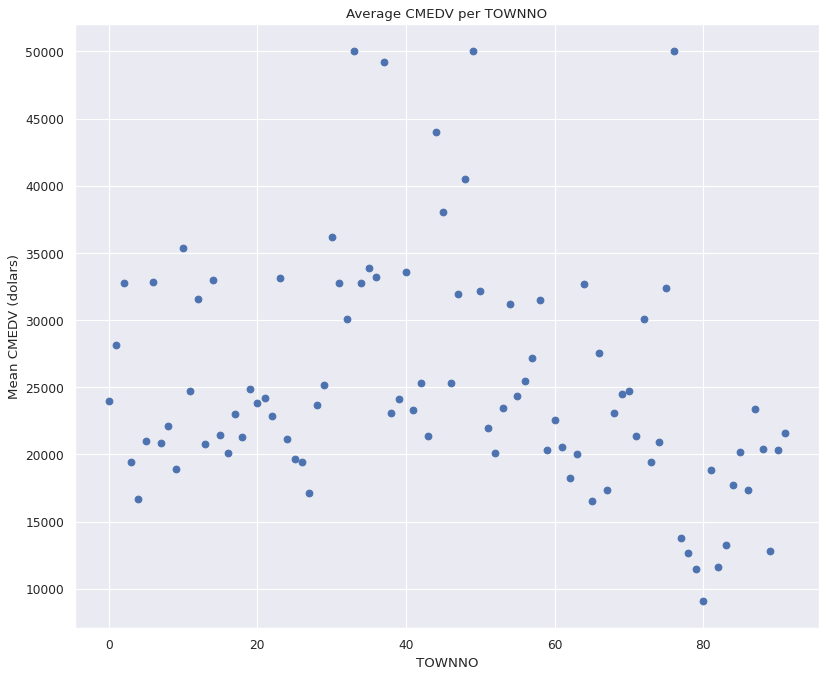

In [289]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.title("Average CMEDV per TOWNNO")
plt.xlabel("TOWNNO")
plt.ylabel("Mean CMEDV (dolars)")

plt.scatter(range(len(mean)),mean)

In [290]:
outliers_mean = [mean>37000][0].nonzero()
print("The towns with high mean were ", end="")
for i in outliers_mean:
    print(i, end=" ")

The towns with high mean were [33 37 44 45 48 49 76] 

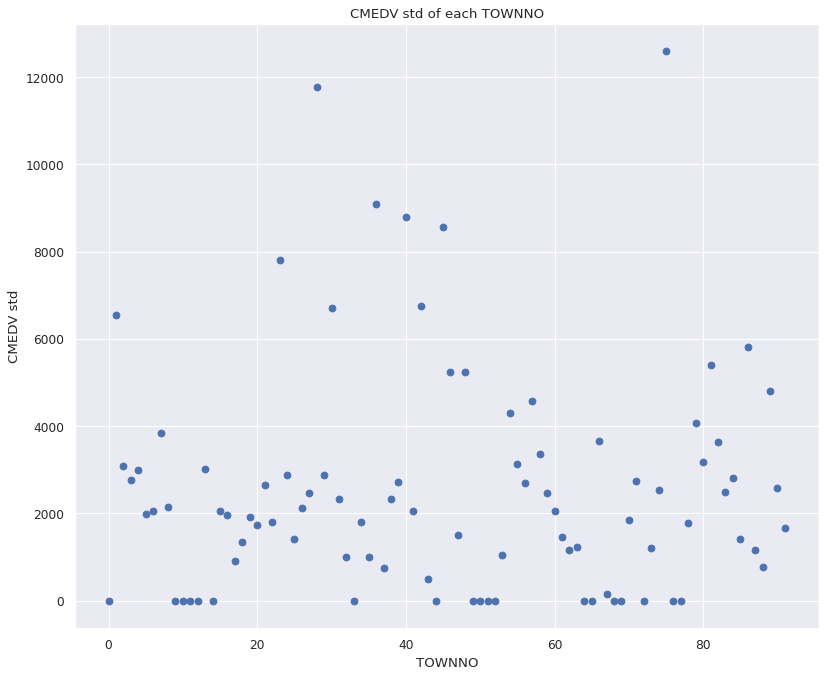

In [291]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.title("CMEDV std of each TOWNNO")
plt.xlabel("TOWNNO")
plt.ylabel("CMEDV std")
plt.scatter(range(len(mean)),std)

In [292]:
outliers_std = [std>8000][0].nonzero()
print("The towns with high deviation were ", end="")
for i in outliers_std:
    print(i, end=" ")

The towns with high deviation were [28 36 40 45 75] 

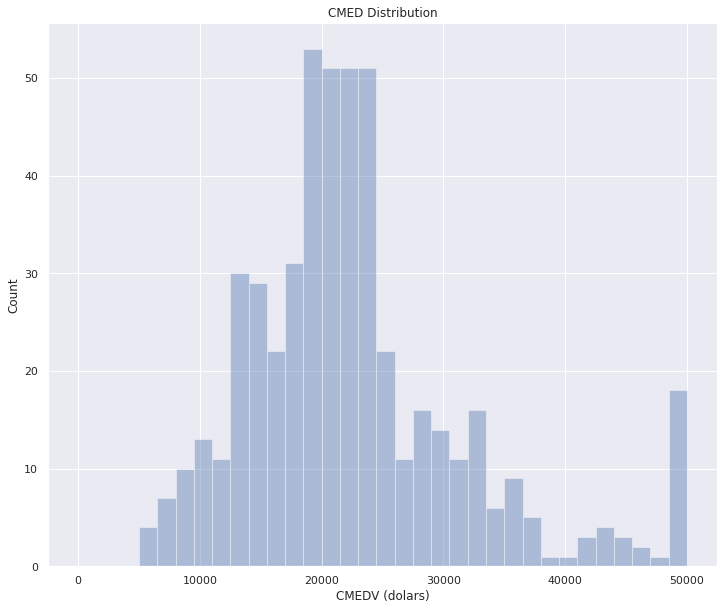

In [293]:
sns.set(rc={'figure.figsize':(12,10)})

(mu, sigma) = stats.norm.fit(boston_corrected["CMEDV"])
#print ("mu={0}, sigma={1}".format(mu, sigma))

ax = sns.distplot(boston_corrected["CMEDV"], bins=30, axlabel="CMEDV (dolars)", kde=False)
plt.ylabel("Count")

x_dummy = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
ax.plot(x_dummy, stats.norm.pdf(x_dummy, mu, sigma))

ax.set_title("CMED Distribution")

plt.show()

<AxesSubplot:>

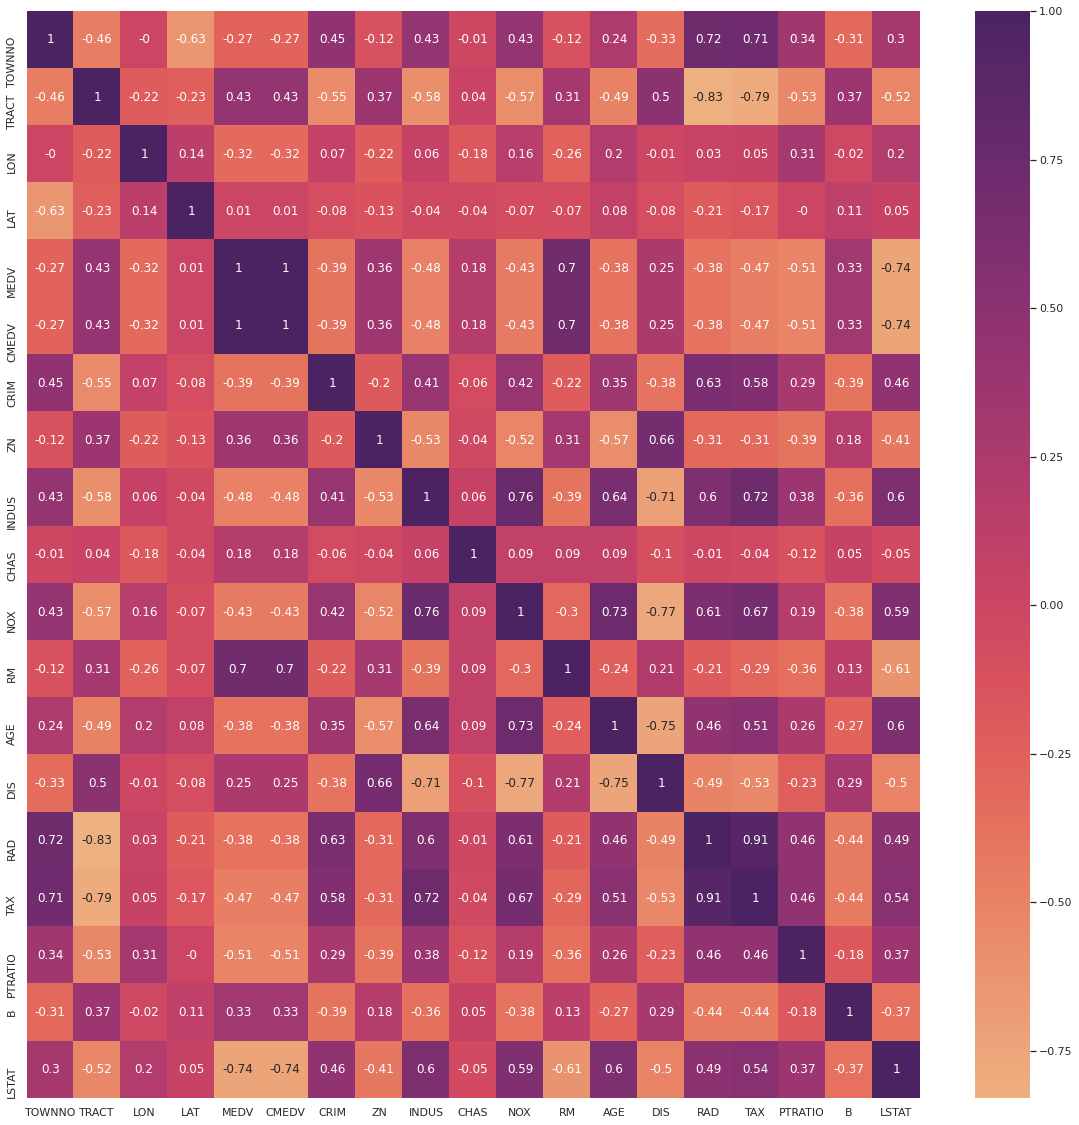

In [294]:
sns.set(rc={'figure.figsize':(20,20)})
correlation_matrix = boston_corrected.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap="flare")